In [230]:
#installing and importing important library
!pip install numpy
!pip install matplotlib
!pip install scikit-learn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In this assignment you will implement a simple Artificial Neural Network (ANN) from scratch (i.e.,
without using built-in functions). Implement the back-propagation algorithm to learn the weights of an
ANN with 2 input nodes, 2 hidden nodes and 1 output node. The hidden layer nodes employ a sigmoid
nonlinearity. Use squared-error loss. Train your network to learn the following binary operations:

1. XOR (10)
2. AND (10)
3. OR (10)

In [231]:
#now here we will declare size of neural netork
#hidden size=3, input size=2,output size=1
P=2
M=3
K=1


In [232]:
#in this shell we initialize the input with gaussian noise and corresponding output for each operation
def gen_data(operation,size):
    noise=0.1
    X=np.array([[0,0],[0,1],[1,0],[1,1]])
    if operation=="XOR":
        Y=np.array([[0],[1],[1],[0]])
    elif operation=="AND":
        Y= np.array([[0],[0],[0],[1]])
    elif operation=="OR":
        Y=np.array([[0],[1],[1],[1]])
    else:
        raise ValueError("Wrong Operation")
    
    X_gen,Y_gen=[],[]
    for i in range(0,size):
        ind=np.random.randint(0,4)
        x=X[ind][0]+np.random.rand()*noise
        y=X[ind][1]+np.random.rand()*noise
        temp=[]
        temp.append(x)
        temp.append(y)
        X_gen.append(temp)
        Y_gen.append([Y[ind]])
    X_gen=np.array(X_gen)
    Y_gen=np.array(Y_gen)    
    return X_gen,Y_gen


In [233]:
#now here we are declaring sigmoid function
# sigmoid(x)=1/(1+e**(-1))
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [234]:
#now here this function will give sigmoid derivative
def der_sigmoid(x):
    s = sigmoid(x)
    return (1-s)*s

In [235]:
# now here is our loss function
#now here we have mean of (y-yhat)**2 mean
def Loss(Y,Y_hat):
    sum=0
    for i in range(0,len(Y)):
        for k in range(0,K):
            sum+=(Y[i][k]-Y_hat[i][k])**2
    sum/=len(Y)
    return sum

In [236]:
#function to calculate accuracy -> correct output/total ouptput
def Accuracy(Y, Y_hat):
        c=0
        for i in range(0,len(Y)):
            Y_round=np.round(Y_hat[i][0])
            if Y_round==Y[i][0]:
                c=c+1
        return c/len(Y)        

In [237]:
# now in shell we will divide our input in test and training-> in 20%:80% -> nearly 1:3
# this one is the function that give use 4 outputs-> X_train,Y_train, X_test,Y_test
def split_data(X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    return X_train,Y_train,X_test,Y_test
     

In [238]:
# now here in this shell we will declare our ANN
class ANN:

    #function init our ANN with eta as learning rate ->0.1
    def __init__(ann):
        # step1-> we have 3 hidden layer here and 2 input layer so here we will have alpha matrix of size 3*2
        # step-> beta matrix 1*3
        ann.alpha=np.random.rand(M,P)
        ann.beta=np.random.rand(K,M)

        ann.eta=0.1
    
    #function give yhat
    def yhat(ann,X_i):
        #step1-> we have to first get z
        z=np.dot(X_i,ann.alpha.T)# 1*p with m*p|p*m-> 1*m
        # so here z is 1*m
        #step2-> apply sigmoid
        z=sigmoid(z)
        #step->3 we have to get yhat
        # 1*m with k*m-> take transpose to make m*k
        yhat=np.dot(z,ann.beta.T)
        #giving us a 1*k
        #step->4 apply sigmoid
        yhat=sigmoid(yhat)
        # print(yhat.shape)
        #yhat is a 1*1 list
        return yhat
    
    #function give array of yhat
    def output_array(ann,X):
        Y_hat=[]
        for i in range(len(X)):
            y=ann.yhat(X[i])
            Y_hat.append(y)
        Y_hat=np.array(Y_hat)        
        return Y_hat    

    def func1(ann,X_i,m):#-> return integer
        # now here we have X of 1*p
        #ann.alpha[m]-> is 1*p
        # print(X_i.shape)
        # print(ann.alpha[m].T.shape)
        arr=np.dot(X_i,ann.alpha[m].T)#-> gives a scalar
        #arr is 1*1 arr
        # print(arr)
        return arr

    def beta_gradient(ann,X,Y,Y_hat,i,k,m):
        res=-2*(Y[i][k]-Y_hat[i][k])*der_sigmoid(ann.beta[k][m]*ann.func1(X[i],m))*ann.func1(X[i],m)
        return res
    
    #beta(k.z) z=np.dot(X(1*p),ann.alpha(m*p).T->1*m   ann.beta[k](1*m).T
    def func2(ann,X_i,k):
        # here X_i is (P) and alpha is (M,P)|(P,M)
        z=np.dot(X_i,ann.alpha.T)
        y=np.dot(z,ann.beta[k])
        return y
    
    def func3(ann,X_i,m):
        z=np.dot(X_i,ann.alpha[m])
        return z
    

    def alpha_gradient(ann,X,Y,Y_hat,i,k,m,p):
        res=-2*(Y[i][k]-Y_hat[i][k])*der_sigmoid(ann.func2(X[i],k))*ann.beta[k][m]*der_sigmoid(ann.func3(X[i],m))*X[i][p]
        return res

    def update(ann,X,Y,Y_hat):
        n=len(X)
        alpha=np.zeros((M,P))
        beta=np.zeros((K,M))
        for k in range(0,K):
            for m in range(0,M):
                gradsum=0
                for i in range(0,n):
                    gradsum+=ann.beta_gradient(X,Y,Y_hat,i,k,m)
                gradsum/=n
                beta[k][m]=ann.beta[k][m]-ann.eta*gradsum

        for m in range(0,M):
            for p in range(0,P):
                gradsum=0
                for i in range(0,n):
                    for k in range(0,K):
                        gradsum+=ann.alpha_gradient(X,Y,Y_hat,i,k,m,p)
                gradsum/=n
                alpha[m][p]=ann.alpha[m][p]-ann.eta*gradsum

        # print(ann.alpha)
        # print(ann.beta)        
        # print("gap")
        ann.alpha=np.array(alpha)
        ann.beta=np.array(beta)
        
        # print(ann.alpha)
        # print(ann.beta)
                    





            



In [239]:
# now here we will train our model
def train(operation,epochs,size):

    #generating data
    X,Y=gen_data(operation,size)
    # print(f'X={X}')
    # print(f'Y={Y}')
    #splitting data
    X_train,Y_train,X_test,Y_test=split_data(X,Y)
    # print(f'X={X_train}')
    # print(f'Y={Y_train}')
    
    # print(f'X={X_test}')
    # print(f'Y={Y_test}')

    #declaring loss and accuracy arrays
    loss_train,accuracy_train,loss_test,accuracy_test=[],[],[],[]
    
    #initialising ann
    ann1=ANN()
    for epoch in range(epochs):


        #Now Training Data
        #Output for training data
        Y_hat_train=ann1.output_array(X_train)
        # print(Y_hat_train)
        #loss for training data
        loss=Loss(Y_train,Y_hat_train)

        #accuracy for training data
        accuracy=Accuracy(Y_train,Y_hat_train)

        #appending in res array
        loss_train.append(loss)
        accuracy_train.append(accuracy)

        #Now test data
        #Output for test data
        Y_hat_test=ann1.output_array(X_test)

        #loss for test data
        loss=Loss(Y_test,Y_hat_test)


        #accuracy for test data
        accuracy=Accuracy(Y_test,Y_hat_test)
        
        #appending in the res array
        loss_test.append(loss)
        accuracy_test.append(accuracy)

        # print(Y_hat_train)
        # print(f'X={xor_accuracy_train}')

        #now moving forward-> updating our parameters
        ann1.update(X_train,Y_train,Y_hat_train)
        

    return loss_train,accuracy_train,loss_test,accuracy_test



    

In [240]:
def graph(operation,type,y):
    x = np.arange(1, len(y)+1)
    plt.scatter(x,y)
    plt.plot(x,y)
    plt.xlabel("No. of iterations")
    plt.ylabel(type)
    plt.legend()
    plt.show()

In [241]:
def model(operation):
    loss_train,accuracy_train,loss_test,accuracy_test=train(operation,1000,1000)
    print(f'Loss_train={loss_train}')
    print(f'Loss_train={accuracy_train}')
    print(f'Loss_train={loss_test}')
    print(f'Loss_train={accuracy_test}')
    graph(operation,"Training loss",loss_train)
    graph(operation,"Training accuracy",accuracy_train)
    graph(operation,"Test loss",loss_test)
    graph(operation,"Test accuracy",accuracy_test)

/tmp/ipykernel_5815/4135526253.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  beta[k][m]=ann.beta[k][m]-ann.eta*gradsum
/tmp/ipykernel_5815/4135526253.py:88: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alpha[m][p]=ann.alpha[m][p]-ann.eta*gradsum


Loss_train=[array([0.30478685]), array([0.30345214]), array([0.30213896]), array([0.30084757]), array([0.2995782]), array([0.29833104]), array([0.29710625]), array([0.29590396]), array([0.29472428]), array([0.29356726]), array([0.29243295]), array([0.29132136]), array([0.29023248]), array([0.28916624]), array([0.2881226]), array([0.28710145]), array([0.28610267]), array([0.28512614]), array([0.28417168]), array([0.28323911]), array([0.28232825]), array([0.28143887]), array([0.28057074]), array([0.27972362]), array([0.27889725]), array([0.27809135]), array([0.27730563]), array([0.27653982]), array([0.27579359]), array([0.27506664]), array([0.27435865]), array([0.27366929]), array([0.27299823]), array([0.27234513]), array([0.27170966]), array([0.27109147]), array([0.27049021]), array([0.26990554]), array([0.26933711]), array([0.26878457]), array([0.26824758]), array([0.26772578]), array([0.26721883]), array([0.26672639]), array([0.26624812]), array([0.26578367]), array([0.26533272]), arr

/tmp/ipykernel_5815/3196181479.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


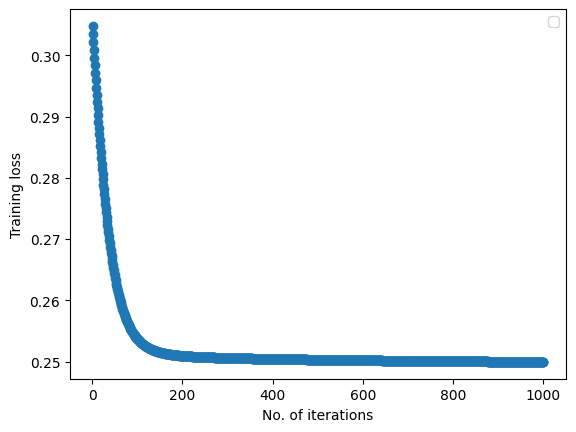

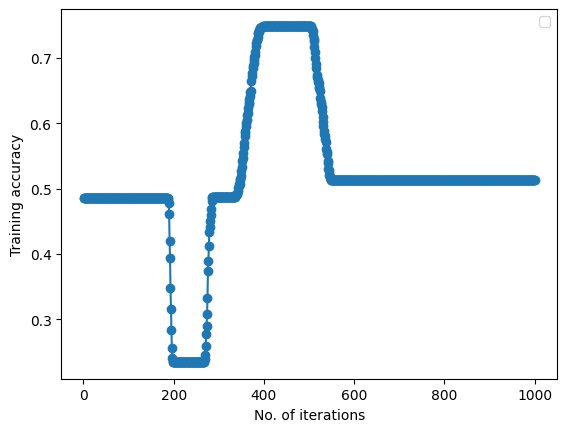

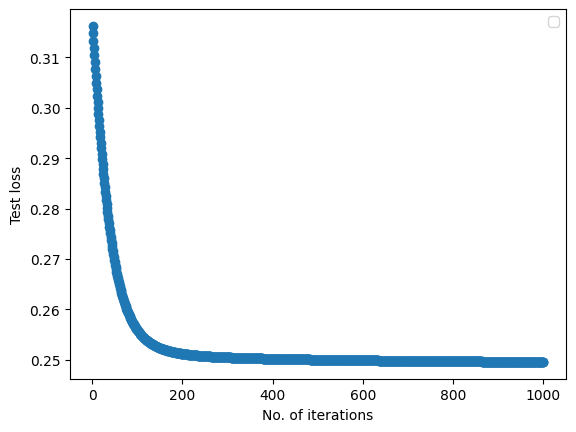

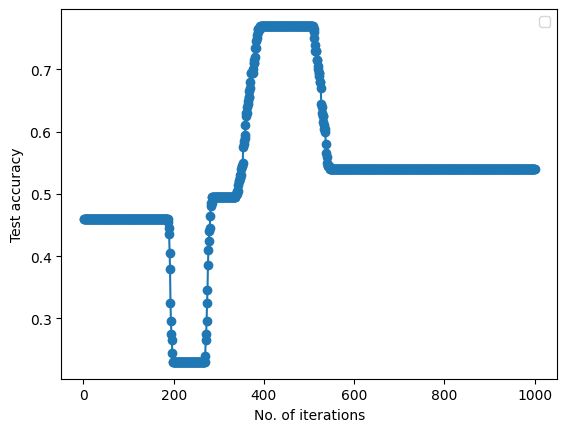

In [242]:
model("XOR")